AUTHOR:         
Sufyan Ahmad: sufianjellani@gmail.com    

[LinkedIn](https://www.linkedin.com/in/sufyanahmad007/)



##  Analyzing Global Population Trends and Their Socioeconomic Implications

## BUSINESS UNDERSTANDING


The objective of this data science project is to:
* analyze global population trends and understand their potential socioeconomic implications using a comprehensive dataset    
* provide insights into how population growth and distribution have evolved over time and how they correlate with different socioeconomic factors.

## DATA UNDERSTANDING

The datasets is obtained from The World Bank website [Population](https://data.worldbank.org/indicator/SP.POP.TOTL)

The dataset contains information about the population of various countries over several decades, along with additional details such as region and income group.   
Columns of the population dataset include:
* ``` Country Name ``` : The name of the country or region.   
* ``` Country Code ```: A unique code or identifier for each country or region.       
* ```Indicator Name```: The name of the indicator or measurement, which in this case is "Population, total."     
* ``` Indicator Code```: A code that identifies the specific  indicator, which is "SP.POP.TOTL" for total population.     

The columns from the metadata:
  
* ```IncomeGroup```: The income group to which the country belongs, such as "High income" or "Low income." Similar to the 'Region' column, not all countries have this information (indicated by NaN).

* ```SpecialNotes```: Additional notes or information related to the country. This column contains text descriptions that may provide context or explanations for specific countries or regions.

* ```TableName```: The name of the country or region.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px


In [59]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats

    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values

    def get_info(self):
        info = self.df.info()
        return info

    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes

    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts



In [60]:
# preview the dataset
population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_5795797.csv', delimiter='\t')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [61]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(population)

In [62]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02,2.650000e+02
mean,1.172707e+08,1.188803e+08,1.210506e+08,1.237328e+08,1.264374e+08,1.291808e+08,1.320399e+08,1.348975e+08,1.378354e+08,1.408784e+08,...,2.927775e+08,2.966763e+08,3.005450e+08,3.044039e+08,3.082563e+08,3.120264e+08,3.157098e+08,3.192923e+08,3.225167e+08,3.254826e+08
std,3.695437e+08,3.740896e+08,3.808059e+08,3.895038e+08,3.982438e+08,4.071151e+08,4.164502e+08,4.257422e+08,4.353216e+08,4.452925e+08,...,9.186842e+08,9.301439e+08,9.414551e+08,9.526713e+08,9.638565e+08,9.746872e+08,9.851681e+08,9.952286e+08,1.004210e+09,1.012173e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.697753e+06,1.743309e+06,1.788196e+06,1.777557e+06,1.791003e+06,1.797085e+06,1.788878e+06,1.790133e+06,1.786038e+06,1.761985e+06
50%,3.757486e+06,3.887144e+06,4.023896e+06,4.139356e+06,4.224612e+06,4.277636e+06,4.331825e+06,4.385700e+06,4.450934e+06,4.530800e+06,...,1.014958e+07,1.028212e+07,1.035808e+07,1.032545e+07,1.030030e+07,1.039533e+07,1.044767e+07,1.060623e+07,1.050577e+07,1.052607e+07
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.023395e+07,6.078914e+07,6.073058e+07,6.062750e+07,6.053671e+07,6.042176e+07,5.987258e+07,6.170452e+07,6.358833e+07,6.549775e+07
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.229732e+09,7.317970e+09,7.405278e+09,7.492157e+09,7.578221e+09,7.661777e+09,7.742682e+09,7.820964e+09,7.888161e+09,7.951150e+09


In [63]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

The dataset above contain information about population totals for various countries over several years, with columns representing different years from 1960 to 2022.   
The data contains a total of 266 rows (entries), each representing a different country or region, and 67 columns

In [64]:
# Get data types
du.get_dtypes()

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2018              float64
2019              float64
2020              float64
2021              float64
2022              float64
Length: 67, dtype: object

In [65]:
# preview the dataset
metadata = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5795797.csv')
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [66]:
# Initialize the DataUnderstanding class
du2 = DataUnderstanding(metadata)

In [67]:
# get summary of the data
du2.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


The above data contains 256 entries and 6 columns


In [68]:
# Get data types
du2.get_dtypes()

Country Code     object
Region           object
IncomeGroup      object
SpecialNotes     object
TableName        object
Unnamed: 5      float64
dtype: object

##  **DATA PREPARATION**

#### Population dataset

In [69]:
# Check for missing values
du.get_missing_values()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              2
                 ..
2018              1
2019              1
2020              1
2021              1
2022              1
Length: 67, dtype: int64

Since there are few  missing values in the dataset i can drop them

In [70]:
population = population.dropna()

In [71]:
# confirm missing values
population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

In [72]:
# get value counts
du.get_value_counts()

{'Country Name': Aruba                   1
 Oman                    1
 Malawi                  1
 Malaysia                1
 North America           1
                        ..
 Guyana                  1
 High income             1
 Hong Kong SAR, China    1
 Honduras                1
 Zimbabwe                1
 Name: Country Name, Length: 266, dtype: int64,
 'Country Code': ABW    1
 OMN    1
 MWI    1
 MYS    1
 NAC    1
       ..
 GUY    1
 HIC    1
 HKG    1
 HND    1
 ZWE    1
 Name: Country Code, Length: 266, dtype: int64,
 'Indicator Name': Population, total    266
 Name: Indicator Name, dtype: int64,
 'Indicator Code': SP.POP.TOTL    266
 Name: Indicator Code, dtype: int64,
 '1960': 571192428.0    2
 97179656.0     2
 227948869.0    2
 32500.0        2
 3497431.0      1
               ..
 4128880.0      1
 72374.0        1
 571990.0       1
 780138593.0    1
 3806310.0      1
 Name: 1960, Length: 260, dtype: int64,
 '1961': 21907.0        2
 233483265.0    2
 99620285.0     2
 

#### Metadata

In [73]:
# check for missing values
du2.get_missing_values()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    139
TableName         0
Unnamed: 5      265
dtype: int64

####  dealing with the missing values

Since the unnamed: 5 column's values is all Nan i will drop the column

In [74]:
metadata = metadata.drop('Unnamed: 5', axis=1)

In [75]:
# Drop the missing values in Region and IncomeGroup
metadata = metadata.dropna(subset=['Region', 'IncomeGroup'])

In [76]:
# Find percentage of the missing values in SpecialNotes columns
special_notes_column = 'SpecialNotes'
missing_percentage = (metadata[special_notes_column].isna().sum() / len(metadata)) * 100

In [77]:
# Set a threshold percentage (e.g., 50%) to decide whether to drop the column
threshold_percentage = 50

# Drop the 'SpecialNotes' column if it has more missing values than the threshold
if missing_percentage > threshold_percentage:
   metadata = metadata.drop(special_notes_column, axis=1)


In [78]:
# confirm missing values in the dataset
metadata.isnull().sum()

Country Code    0
Region          0
IncomeGroup     0
TableName       0
dtype: int64

Replace the TableName column name to Country Name

In [79]:
metadata = metadata.rename(columns={'TableName': 'Country Name'})

#### Merge the two dataset

In [80]:
merged_data = pd.merge(population, metadata,  on=['Country Code', 'Country Name'], how='inner')
merged_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,Region,IncomeGroup
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,Latin America & Caribbean,High income
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,South Asia,Low income
2,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0,2775634.0,Europe & Central Asia,Upper middle income
4,Andorra,AND,"Population, total",SP.POP.TOTL,9443.0,10216.0,11014.0,11839.0,12690.0,13563.0,...,71746.0,72540.0,73837.0,75013.0,76343.0,77700.0,79034.0,79824.0,Europe & Central Asia,High income


## **EXPLORATORY DATA ANALYSIS**



In [81]:
categorical_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'IncomeGroup']
numerical_columns = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


##### Population Distribution

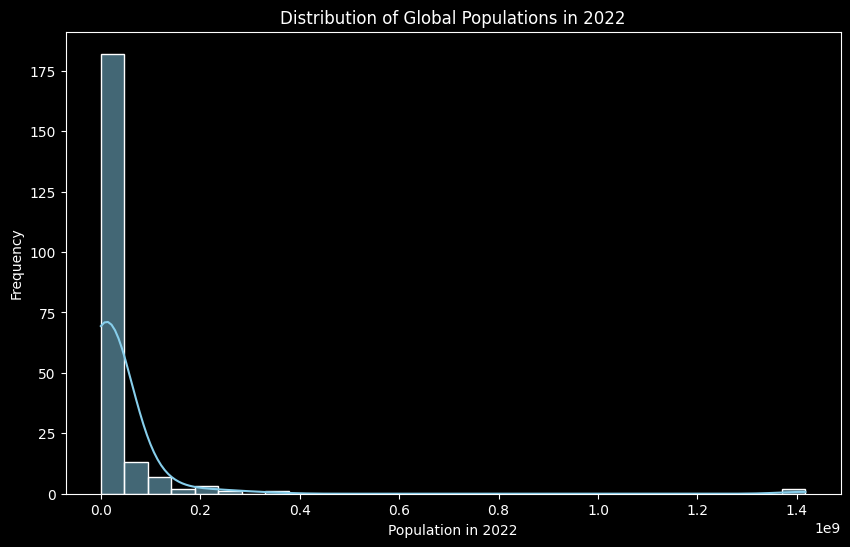

In [82]:
# Histogram of Population (2022)
# Set the style to dark_background
plt.style.use("dark_background")
# Create a histogram of global populations in 2022
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='2022', bins=30, kde=True, color='skyblue')
plt.xlabel('Population in 2022')
plt.ylabel('Frequency')
plt.title('Distribution of Global Populations in 2022')
plt.show()

*inference*
* Histogram Shape: The histogram appears to have a right-skewed distribution
* In 2022, many countries likely had relatively lower populations, with a few countries having significantly higher populations
* Implications: The right-skewed distribution may have socioeconomic implications. It suggests that a few highly populated countries or regions significantly contribute to the overall global population, while the majority of countries have smaller populations. This can influence resource allocation, urban planning, and policy decisions

##### Average Population by Region in 2022

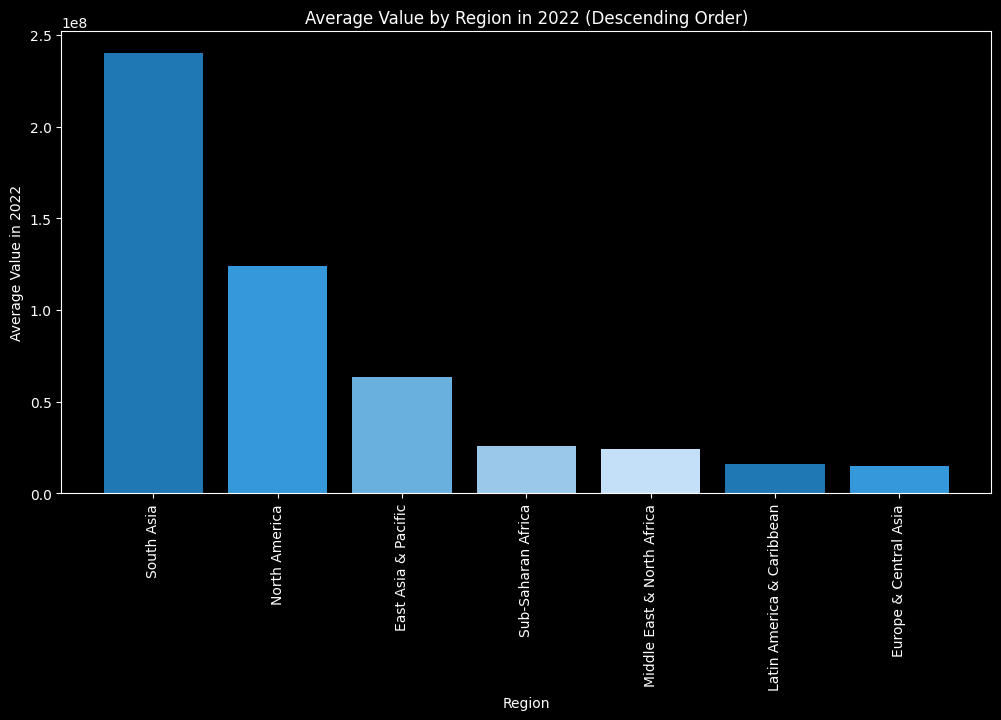

In [83]:
# Calculate the average value for each region for the year 2022
region_avg = merged_data.groupby('Region')['2022'].mean().reset_index()

# Sort the region_avg DataFrame by '2022' column in descending order
region_avg_sorted = region_avg.sort_values(by='2022', ascending=False)

# Define a list of shades of blue
shades_of_blue = ['#1f77b4', '#3498db', '#6ab0de', '#9ac8eb', '#c4e0f9']

plt.figure(figsize=(12, 6))
plt.bar(region_avg_sorted['Region'], region_avg_sorted['2022'], color=shades_of_blue)
plt.xlabel('Region')
plt.ylabel(f'Average Value in 2022')
plt.title(f'Average Value by Region in 2022 (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


*inference*  
* from above in 2022 South Asia has the highest population among the other regions
* High-Population Regions: The top 3 regions  represent areas with the highest average populations in 2022. These regions may include densely populated countries and urban centers.
* Low-Population Regions: These regions may include sparsely populated areas and smaller countries.
* Socioeconomic Implications: High-population regionslike South Asia  may face challenges related to resource management, infrastructure development, healthcare, and education. Policymakers may need to address these challenges to ensure the well-being of their populations

##### Top 10 Region with the highest Population(2010-2022)

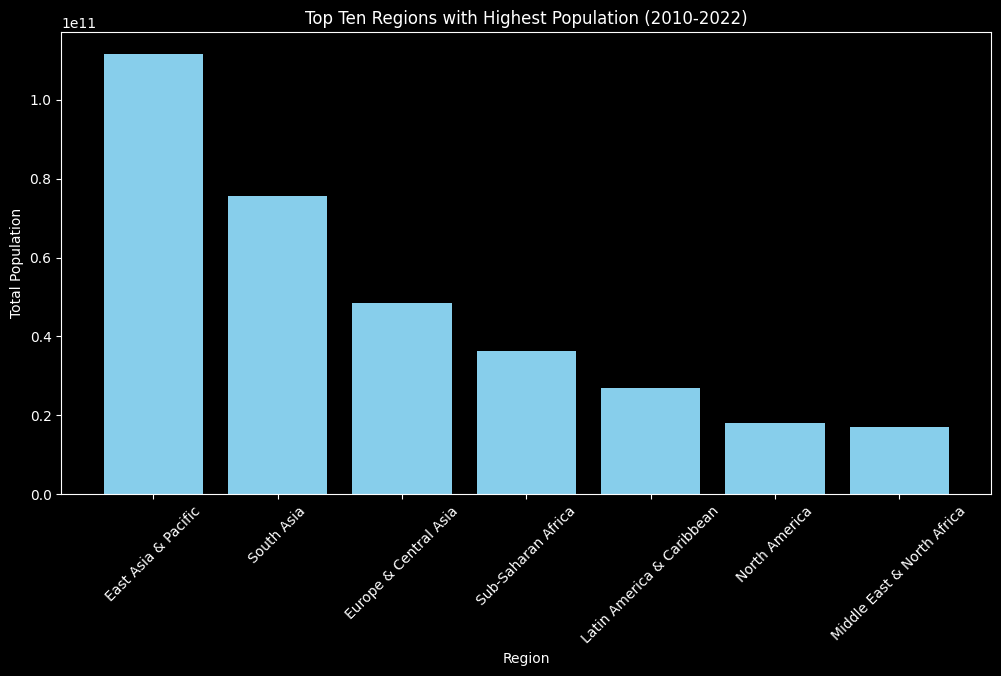

In [84]:
# Extract the relevant columns for years 2010 to 2022
years = [str(year) for year in range(1960, 2023)]
region_populations = merged_data[['Region'] + years]
# Group the data by region and calculate the total population for each region
region_total_population = region_populations.groupby('Region').sum()

# Calculate the total population for each region over the specified years
region_total_population['Total'] = region_total_population.sum(axis=1)

# Sort the regions by total population in descending order
top_ten_regions = region_total_population.sort_values(by='Total', ascending=False).head(10)

# Create a bar plot for the top ten regions
plt.figure(figsize=(12, 6))
plt.bar(top_ten_regions.index, top_ten_regions['Total'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.title('Top Ten Regions with Highest Population (2010-2022)')
plt.xticks(rotation=45)
plt.show()

*inference*
* East Asian & Pacific region has the highest population and middle East and North Africa having the lowest population

##### Income Group Distribution (Bar Chart) using Plotly:

In [85]:

income_group_counts = merged_data['IncomeGroup'].value_counts()
fig = px.bar(income_group_counts, x=income_group_counts.index, y=income_group_counts.values,
             labels={'x':'Income Group', 'y':'Count'},
             title='Income Group Distribution')

# Set the background color to black
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black',
    'font_color': 'white'  # Set text color to white for visibility
})

fig.show()

*inference*
* The visualization provides a clear overview of income diversity across regions. It highlights the variation in economic conditions and standards of living among countries worldwide.
* The Income group with the highest count is is High Income indicating that a significant number of countries fall into this category and likely encompassing developed and industrialized countries.
* the lowest is the low income groups which indicates the existence of countries facing economic challenges and potentially struggling with poverty and development issues.

###  **BIVARIATE ANALYSIS**


#### Population vs. Year (Line Graph) using Plotly:

In [86]:
df_melted = merged_data.melt(id_vars=['Country Name'], var_name='Year', value_name='Population')
fig = px.line(df_melted, x='Year', y='Population', title='Global Population Over Time')
# Set the background color to black
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black',
    'font_color': 'white'  # Set text color to white for visibility
})
fig.show()

*inference*
* Population Growth: The upward trend in the line chart indicates that the global population has been steadily increasing over the years. This observation aligns with historical trends of population growth worldwide
* The continuous population growth has significant socioeconomic implications, including considerations related to resource allocation, urbanization, healthcare, education, and environmental sustainability.

##### Distribution of Population Over the years  by region

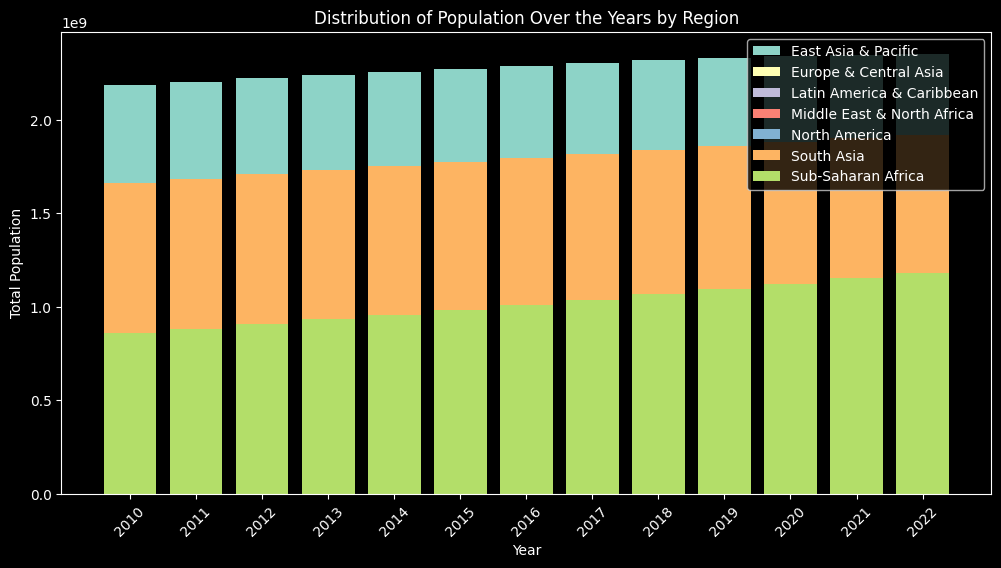

In [87]:
region_populations = merged_data.groupby('Region')[[str(year) for year in range(2010, 2023)]].sum()

# Transpose the data for plotting
region_populations = region_populations.transpose()

# Create a bar graph for each region's population over the years
plt.figure(figsize=(12, 6))
for region in region_populations.columns:
    plt.bar(region_populations.index, region_populations[region], label=region)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Distribution of Population Over the Years by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

*nference*
* The upward trends in the bars for most regions indicate that their populations have generally been growing over the specified period.
* The bar graph effectively illustrates how populations have evolved in different regions over a specific period, providing insights into regional demographic trends and helping inform policy decisions and resource allocation strategies

## **Multivariate Analysis**

##### Distribution of income group by Region

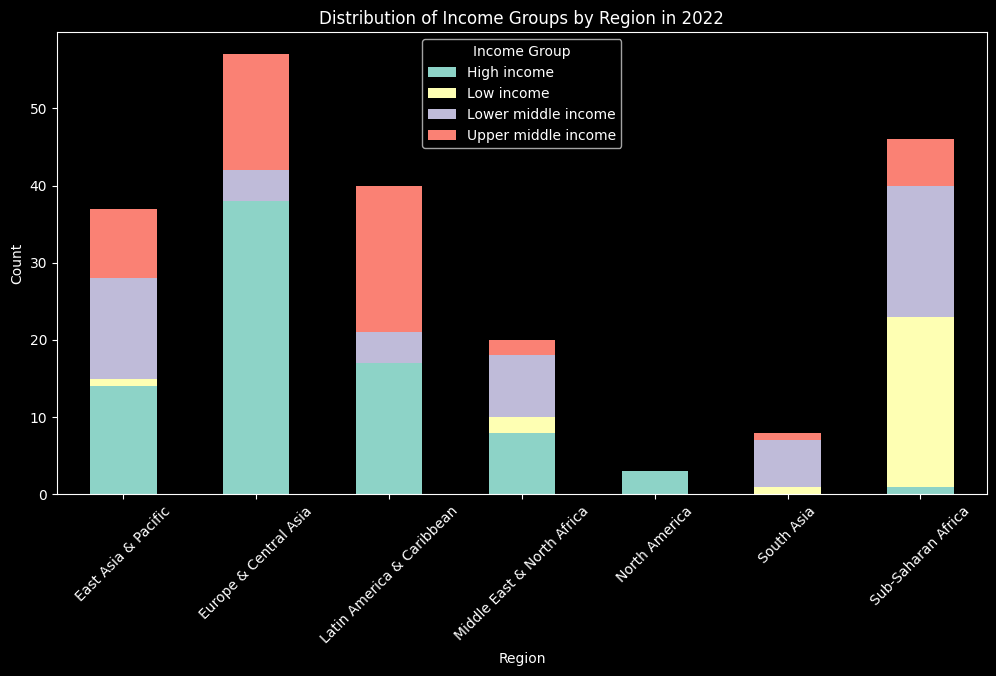

In [88]:
# Filter the data for the year 2022
data_2022 = merged_data[['Region', 'IncomeGroup', '2022']]

# Pivot the data to have IncomeGroup as columns and Region as index
pivot_data = data_2022.pivot_table(index='Region', columns='IncomeGroup', values='2022', aggfunc='count', fill_value=0)

# Create a stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Income Groups by Region in 2022')

# Show the legend
plt.legend(title='Income Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


This stacked bar chart provides a visual representation of the income group distribution across various regions in 2022, offering insights into the economic landscape at a global level  

*inference*
* In most regions, the dominant income group in 2022 is "High income." This suggests that a significant number of regions have a higher proportion of high-income countries compared to other income groups
* The sub-saharan Africa Region has Low income group which is highly revelent indicating economic diversity within this region.
* Middle Income Groups: The "Upper middle income" and "Lower middle income" groups are present in various regions but often to a lesser extent than "High income" and "Low income" groups. This suggests a global distribution of countries across these middle-income categories.

